In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Import data

In [3]:
# import ppc data table
ppc_data = pd.read_csv('./../data-workfile/ppc_performance.csv', index_col='Unnamed: 0')
ppc_data.head()

,date,daily_google_spend,daily_microsoft_spend,daily_meta_spend,hotel_id,google_user_count_website,meta_user_count_website,microsoft_user_count_website,google_user_count_datepicker,meta_user_count_datepicker,...,nights,adults,children,conversion,total_price_final,rooms_total_price,upsell_total_price,vouchers_total_price,loyalty_discount_total,redeemed_loyalty_points_total
0,2024-09-18,128044,10564,35950,hotel_1,718.0,165.0,21.0,175.0,27.0,...,2.735549,2.119942,0.771676,0.021676,4465.120614,243496.644013,233.333333,0.0,27071.967160,11112.200000
1,2024-09-19,137322,12048,53112,hotel_1,684.0,153.0,28.0,150.0,29.0,...,2.612132,2.233456,0.571691,0.051471,12131.416631,269983.235643,296.428571,0.0,28952.151964,5274.274857
2,2024-09-20,124825,8484,61717,hotel_1,690.0,159.0,25.0,144.0,29.0,...,2.586957,2.213439,0.456522,0.029644,6670.116759,259810.836880,1760.000000,0.0,24767.619867,11797.945000
3,2024-09-21,106588,6976,64140,hotel_1,638.0,172.0,27.0,146.0,22.0,...,2.661123,2.301455,0.623701,0.035343,7856.468426,244883.079524,2191.176471,0.0,22007.950824,2480.345588
4,2024-09-22,144448,6684,73310,hotel_1,725.0,267.0,20.0,197.0,38.0,...,2.658046,2.206897,0.800287,0.037356,7487.252966,230005.860473,873.076923,0.0,23415.802962,7035.131965


# Analysis

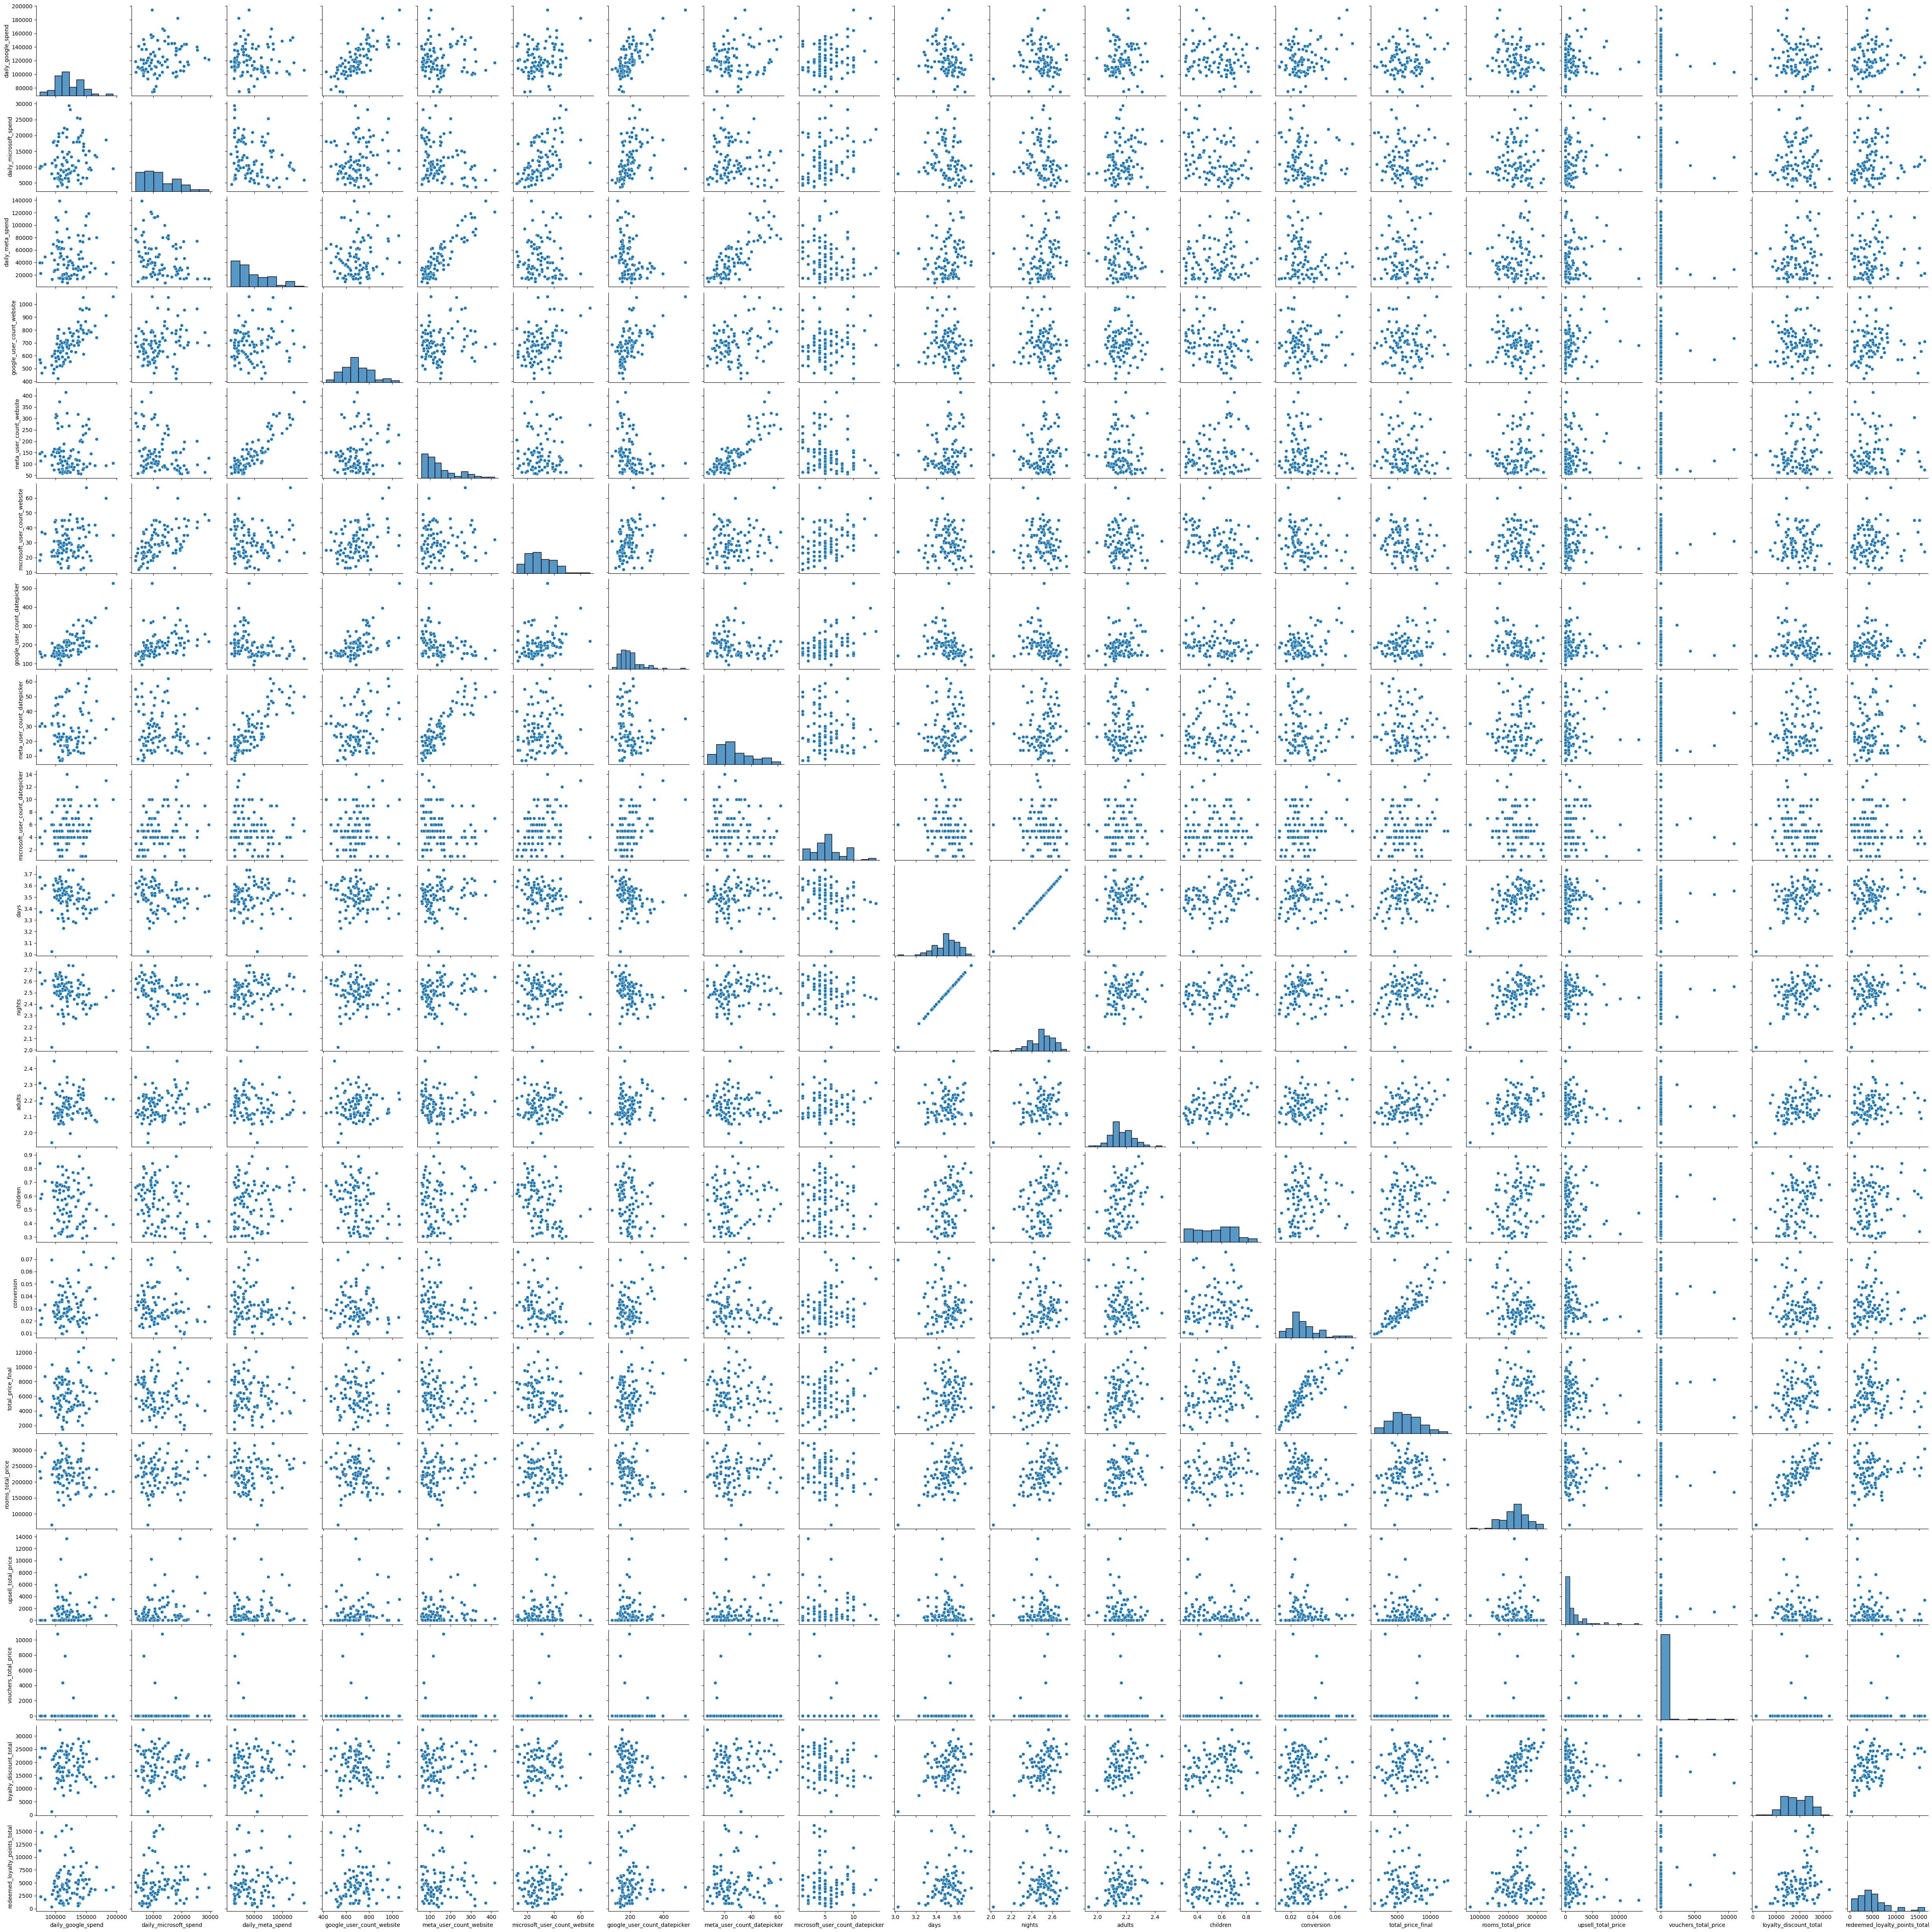

In [4]:
# check distributions - there are skewed data, so I will use 'Spearmans rank correlation'
sns.pairplot(data=ppc_data)

Text(0.5, 1.0, 'Hotel 3')

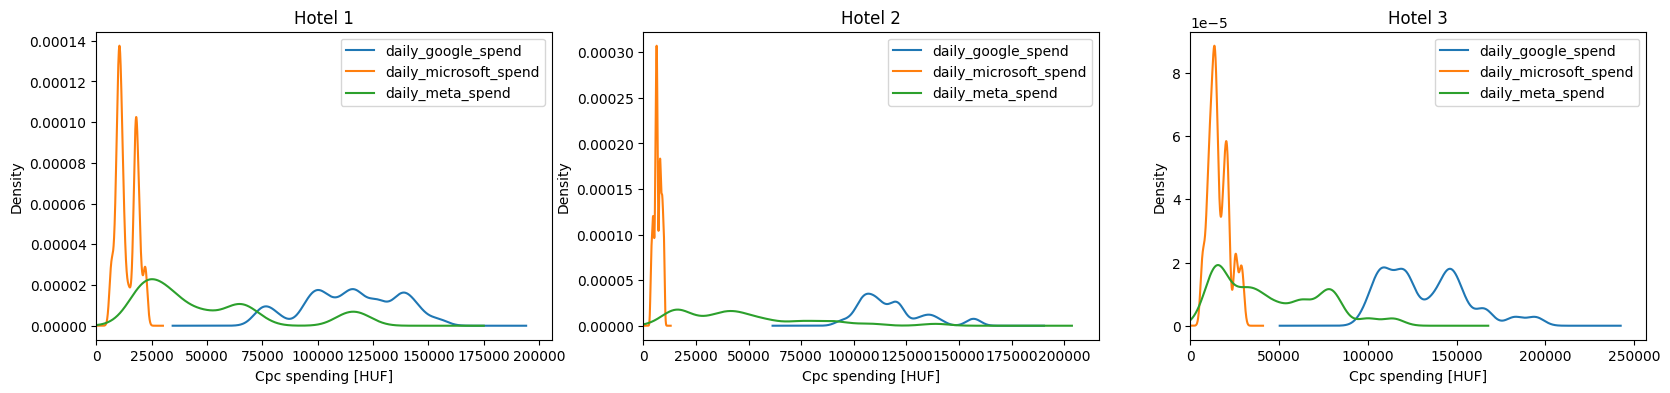

In [5]:
# distribution of cpc spending by each hotel
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ppc_data[ppc_data['hotel_id']=='hotel_1'][['daily_google_spend','daily_microsoft_spend', 'daily_meta_spend']].plot(ax=ax1, kind='kde', bw_method=0.2)
ppc_data[ppc_data['hotel_id']=='hotel_2'][['daily_google_spend','daily_microsoft_spend', 'daily_meta_spend']].plot(ax=ax2, kind='kde', bw_method=0.2)
ppc_data[ppc_data['hotel_id']=='hotel_3'][['daily_google_spend','daily_microsoft_spend', 'daily_meta_spend']].plot(ax=ax3, kind='kde', bw_method=0.2)
ax1.set_xlim(left=0)
ax2.set_xlim(left=0)
ax3.set_xlim(left=0)
ax1.set_xlabel('Cpc spending [HUF]')
ax2.set_xlabel('Cpc spending [HUF]')
ax3.set_xlabel('Cpc spending [HUF]')
ax1.set_title('Hotel 1')
ax2.set_title('Hotel 2')
ax3.set_title('Hotel 3')

In [6]:
# average advertising cost
ppc_data[['hotel_id','daily_google_spend','daily_microsoft_spend','daily_meta_spend']].groupby(by='hotel_id').mean().astype(int)

,daily_google_spend,daily_microsoft_spend,daily_meta_spend
hotel_id,,,
hotel_1,114811,13732,48133
hotel_2,117611,6851,46716
hotel_3,132754,16133,45552


Text(0.5, 1.0, 'Hotel 3')

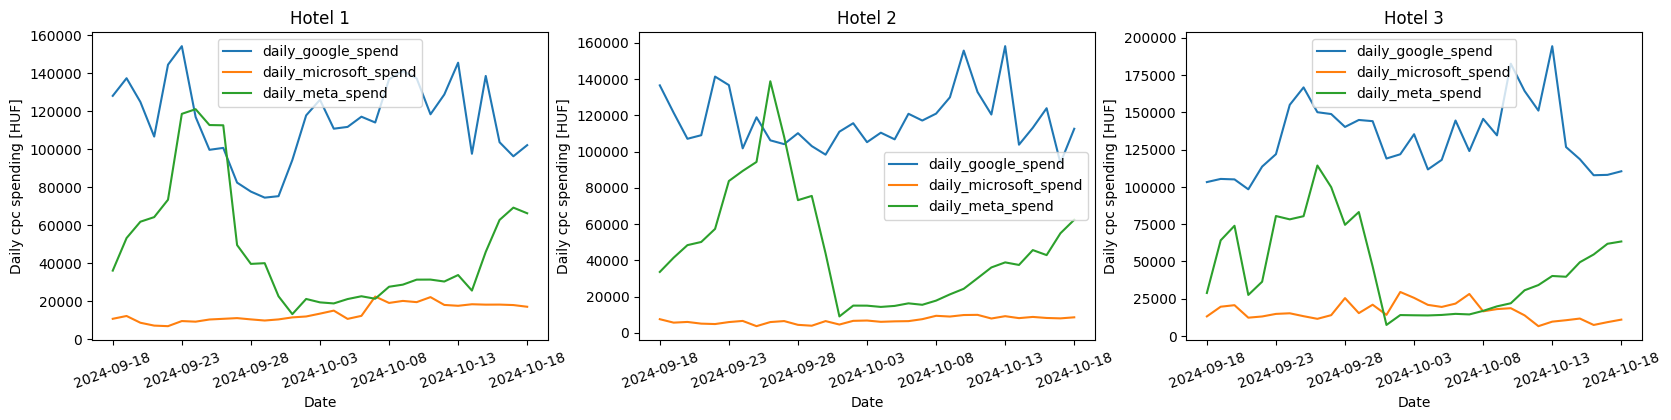

In [7]:
# change of cpc spending during the observed perioid for each hotel
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ppc_data[ppc_data['hotel_id']=='hotel_1'][['date','daily_google_spend','daily_microsoft_spend', 'daily_meta_spend']].plot(ax=ax1, kind='line', x='date').set_xticklabels(ax1.get_xticklabels(), rotation=20);
ppc_data[ppc_data['hotel_id']=='hotel_2'][['date','daily_google_spend','daily_microsoft_spend', 'daily_meta_spend']].plot(ax=ax2, kind='line', x='date').set_xticklabels(ax2.get_xticklabels(), rotation=20);
ppc_data[ppc_data['hotel_id']=='hotel_3'][['date','daily_google_spend','daily_microsoft_spend', 'daily_meta_spend']].plot(ax=ax3, kind='line', x='date').set_xticklabels(ax3.get_xticklabels(), rotation=20);
ax1.set_xlabel('Date')
ax2.set_xlabel('Date')
ax3.set_xlabel('Date')
ax1.set_ylabel('Daily cpc spending [HUF]')
ax2.set_ylabel('Daily cpc spending [HUF]')
ax3.set_ylabel('Daily cpc spending [HUF]')
ax1.set_title('Hotel 1')
ax2.set_title('Hotel 2')
ax3.set_title('Hotel 3')

Text(0.5, 0.98, 'Correlation of cpc spending and website and datepicker sub-page visitors')

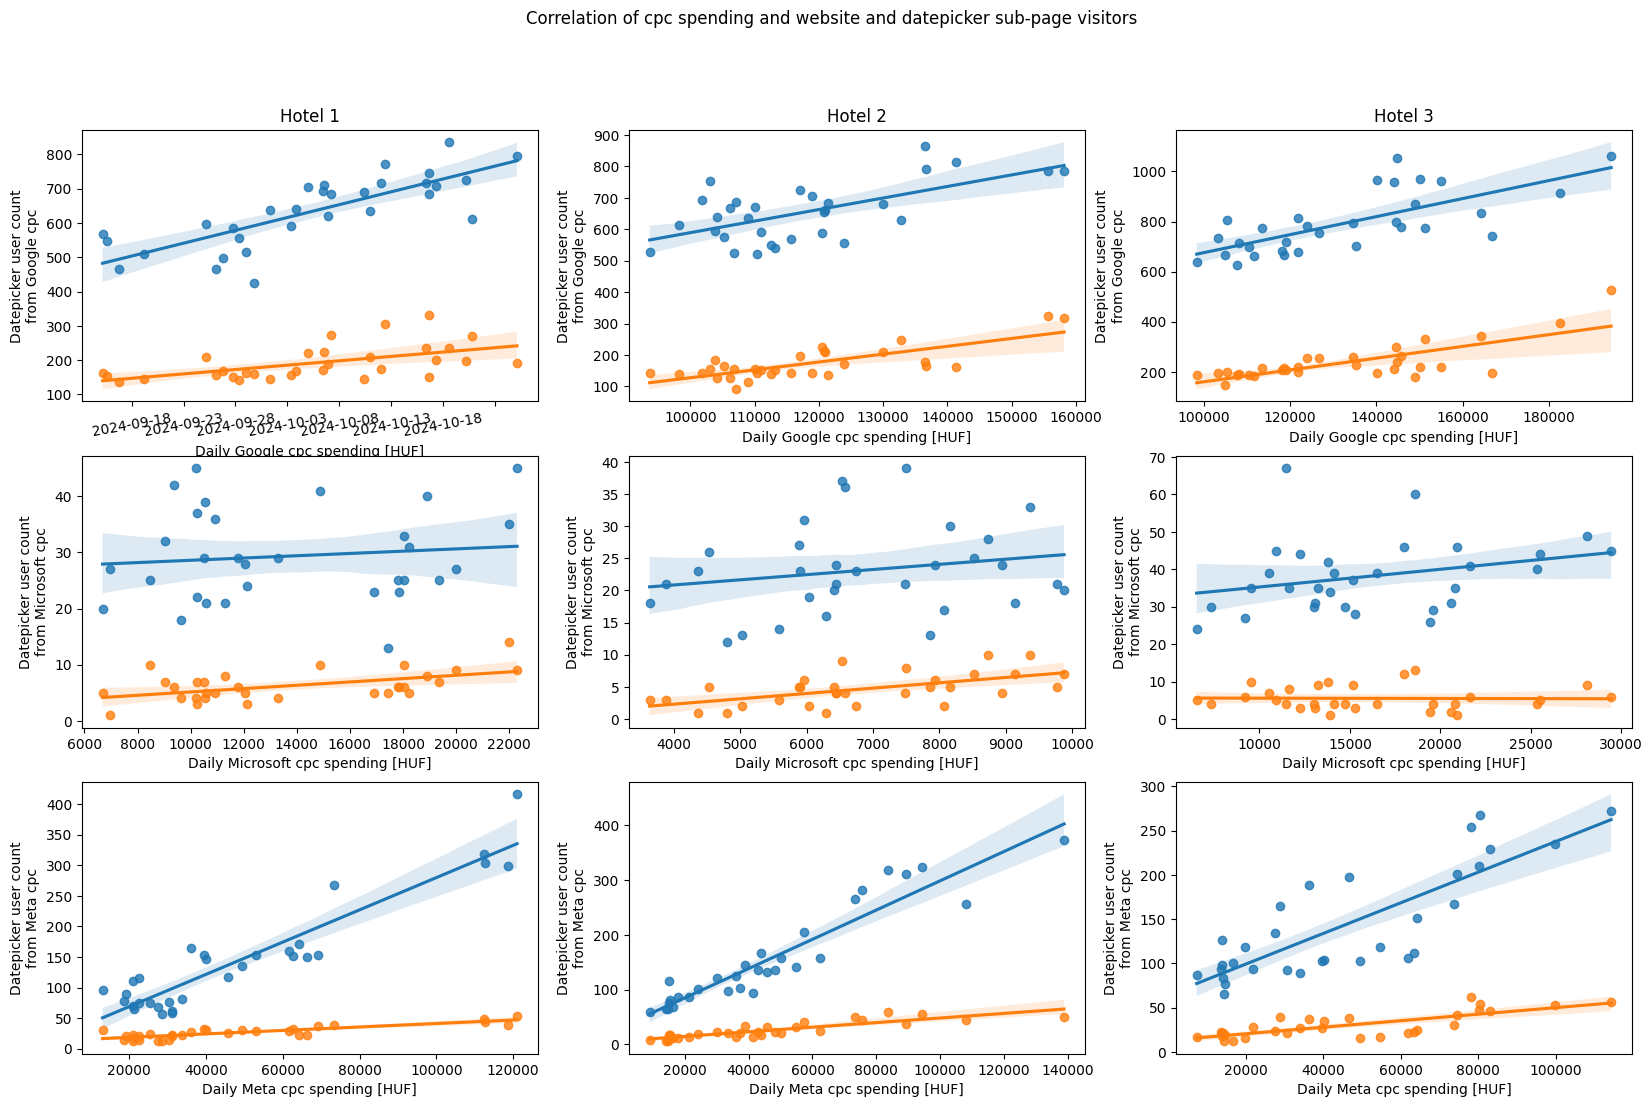

In [8]:
# correlation of cpc spending and website and datepicker sub-page visitors

fig, ((ax11, ax12, ax13), (ax21, ax22, ax23), (ax31, ax32, ax33)) = plt.subplots(3, 3, figsize=(20,12))

sns.regplot(ax=ax11, data=ppc_data[ppc_data['hotel_id']=='hotel_1'], x='daily_google_spend', y='google_user_count_website').set_xticklabels(ax1.get_xticklabels(), rotation=10);
sns.regplot(ax=ax11, data=ppc_data[ppc_data['hotel_id']=='hotel_1'], x='daily_google_spend', y='google_user_count_datepicker')
ax11.set_title('Hotel 1')
ax11.set_ylabel('Datepicker user count''\n''from Google cpc')
ax11.set_xlabel('Daily Google cpc spending [HUF]')

sns.regplot(ax=ax12, data=ppc_data[ppc_data['hotel_id']=='hotel_2'], x='daily_google_spend', y='google_user_count_website')
sns.regplot(ax=ax12, data=ppc_data[ppc_data['hotel_id']=='hotel_2'], x='daily_google_spend', y='google_user_count_datepicker')
ax12.set_title('Hotel 2')
ax12.set_ylabel('Datepicker user count''\n''from Google cpc')
ax12.set_xlabel('Daily Google cpc spending [HUF]')

sns.regplot(ax=ax13, data=ppc_data[ppc_data['hotel_id']=='hotel_3'], x='daily_google_spend', y='google_user_count_website')
sns.regplot(ax=ax13, data=ppc_data[ppc_data['hotel_id']=='hotel_3'], x='daily_google_spend', y='google_user_count_datepicker')
ax13.set_title('Hotel 3')
ax13.set_ylabel('Datepicker user count''\n''from Google cpc')
ax13.set_xlabel('Daily Google cpc spending [HUF]')

sns.regplot(ax=ax21, data=ppc_data[ppc_data['hotel_id']=='hotel_1'], x='daily_microsoft_spend', y='microsoft_user_count_website')
sns.regplot(ax=ax21, data=ppc_data[ppc_data['hotel_id']=='hotel_1'], x='daily_microsoft_spend', y='microsoft_user_count_datepicker')
ax21.set_ylabel('Datepicker user count''\n''from Microsoft cpc')
ax21.set_xlabel('Daily Microsoft cpc spending [HUF]')

sns.regplot(ax=ax22, data=ppc_data[ppc_data['hotel_id']=='hotel_2'], x='daily_microsoft_spend', y='microsoft_user_count_website')
sns.regplot(ax=ax22, data=ppc_data[ppc_data['hotel_id']=='hotel_2'], x='daily_microsoft_spend', y='microsoft_user_count_datepicker')
ax22.set_ylabel('Datepicker user count''\n''from Microsoft cpc')
ax22.set_xlabel('Daily Microsoft cpc spending [HUF]')

sns.regplot(ax=ax23, data=ppc_data[ppc_data['hotel_id']=='hotel_3'], x='daily_microsoft_spend', y='microsoft_user_count_website')
sns.regplot(ax=ax23, data=ppc_data[ppc_data['hotel_id']=='hotel_3'], x='daily_microsoft_spend', y='microsoft_user_count_datepicker')
ax23.set_ylabel('Datepicker user count''\n''from Microsoft cpc')
ax23.set_xlabel('Daily Microsoft cpc spending [HUF]')

sns.regplot(ax=ax31, data=ppc_data[ppc_data['hotel_id']=='hotel_1'], x='daily_meta_spend', y='meta_user_count_website')
sns.regplot(ax=ax31, data=ppc_data[ppc_data['hotel_id']=='hotel_1'], x='daily_meta_spend', y='meta_user_count_datepicker')
ax31.set_ylabel('Datepicker user count''\n''from Meta cpc')
ax31.set_xlabel('Daily Meta cpc spending [HUF]')

sns.regplot(ax=ax32, data=ppc_data[ppc_data['hotel_id']=='hotel_2'], x='daily_meta_spend', y='meta_user_count_website')
sns.regplot(ax=ax32, data=ppc_data[ppc_data['hotel_id']=='hotel_2'], x='daily_meta_spend', y='meta_user_count_datepicker')
ax32.set_ylabel('Datepicker user count''\n''from Meta cpc')
ax32.set_xlabel('Daily Meta cpc spending [HUF]')

sns.regplot(ax=ax33, data=ppc_data[ppc_data['hotel_id']=='hotel_3'], x='daily_meta_spend', y='meta_user_count_website')
sns.regplot(ax=ax33, data=ppc_data[ppc_data['hotel_id']=='hotel_3'], x='daily_meta_spend', y='meta_user_count_datepicker')
ax33.set_ylabel('Datepicker user count''\n''from Meta cpc')
ax33.set_xlabel('Daily Meta cpc spending [HUF]')

fig.suptitle('Correlation of cpc spending and website and datepicker sub-page visitors')

Text(0.5, 0.98, 'Correlation only for cpc spending and datepicker sub-page ')

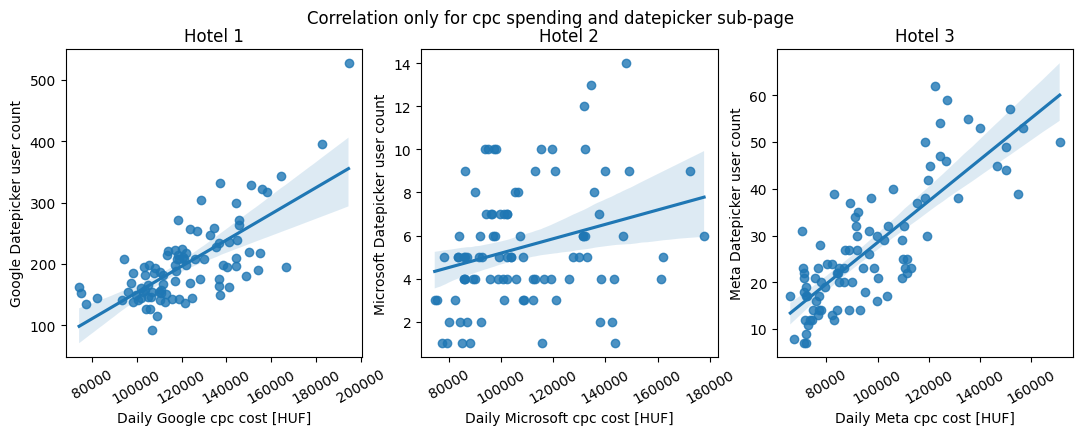

In [9]:
# correlation only for cpc spending and datepicker sub-page 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,4))
sns.regplot(ax=ax1, data=ppc_data, x='daily_google_spend', y='google_user_count_datepicker').set_xticklabels(ax1.get_xticklabels(), rotation=30);
sns.regplot(ax=ax2, data=ppc_data, x='daily_microsoft_spend', y='microsoft_user_count_datepicker').set_xticklabels(ax1.get_xticklabels(), rotation=30);
sns.regplot(ax=ax3, data=ppc_data, x='daily_meta_spend', y='meta_user_count_datepicker').set_xticklabels(ax1.get_xticklabels(), rotation=30);
ax1.set_xlabel('Daily Google cpc cost [HUF]')
ax2.set_xlabel('Daily Microsoft cpc cost [HUF]')
ax3.set_xlabel('Daily Meta cpc cost [HUF]')
ax1.set_ylabel('Google Datepicker user count')
ax2.set_ylabel('Microsoft Datepicker user count')
ax3.set_ylabel('Meta Datepicker user count')
ax1.set_title('Hotel 1')
ax2.set_title('Hotel 2')
ax3.set_title('Hotel 3')
fig.suptitle('Correlation only for cpc spending and datepicker sub-page ')

Text(0.5, 1.0, 'Correlation table between cpc spending and website visitors\nfor each hotel, and each cpc source')

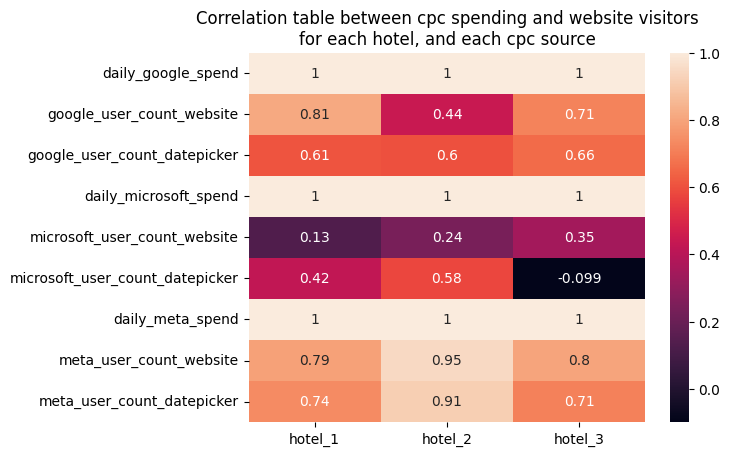

In [10]:
# correlation table between cpc spending and website visitors for each hotel, and each cpc source
sns.heatmap(pd.concat([pd.concat([ppc_data[ppc_data['hotel_id']=='hotel_1'][['daily_google_spend', 'google_user_count_website', 'google_user_count_datepicker']].corr(method='spearman')['daily_google_spend'],
                      ppc_data[ppc_data['hotel_id']=='hotel_1'][['daily_microsoft_spend', 'microsoft_user_count_website', 'microsoft_user_count_datepicker']].corr(method='spearman')['daily_microsoft_spend'],
                      ppc_data[ppc_data['hotel_id']=='hotel_1'][['daily_meta_spend', 'meta_user_count_website', 'meta_user_count_datepicker']].corr(method='spearman')['daily_meta_spend']], axis=0),
           pd.concat([ppc_data[ppc_data['hotel_id']=='hotel_2'][['daily_google_spend', 'google_user_count_website', 'google_user_count_datepicker']].corr(method='spearman')['daily_google_spend'],
                      ppc_data[ppc_data['hotel_id']=='hotel_2'][['daily_microsoft_spend', 'microsoft_user_count_website', 'microsoft_user_count_datepicker']].corr(method='spearman')['daily_microsoft_spend'],
                      ppc_data[ppc_data['hotel_id']=='hotel_2'][['daily_meta_spend', 'meta_user_count_website', 'meta_user_count_datepicker']].corr(method='spearman')['daily_meta_spend']], axis=0),
           pd.concat([ppc_data[ppc_data['hotel_id']=='hotel_3'][['daily_google_spend', 'google_user_count_website', 'google_user_count_datepicker']].corr(method='spearman')['daily_google_spend'],
                      ppc_data[ppc_data['hotel_id']=='hotel_3'][['daily_microsoft_spend', 'microsoft_user_count_website', 'microsoft_user_count_datepicker']].corr(method='spearman')['daily_microsoft_spend'],
                      ppc_data[ppc_data['hotel_id']=='hotel_3'][['daily_meta_spend', 'meta_user_count_website', 'meta_user_count_datepicker']].corr(method='spearman')['daily_meta_spend']], axis=0)], axis=1).rename(columns={0:'hotel_1', 1:'hotel_2', 2:'hotel_3'}),
            annot=True)

plt.title('Correlation table between cpc spending and website visitors''\n''for each hotel, and each cpc source')

<Axes: >

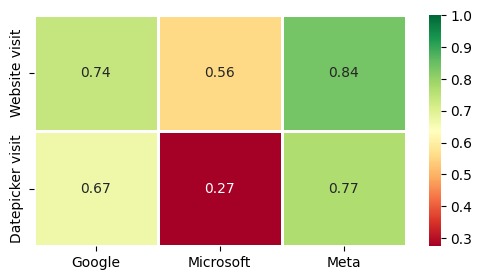

In [11]:
# restructured correlation table
plt.figure(figsize=(6,3))
sns.heatmap(pd.concat([ppc_data[['daily_google_spend', 'google_user_count_website', 'google_user_count_datepicker']].corr(method='spearman').loc[:,['daily_google_spend']].rename(index={'daily_google_spend':'Daily spend', 'google_user_count_website':'Website visit', 'google_user_count_datepicker':'Datepicker visit'}, columns={'daily_google_spend':'Google'}),
                      ppc_data[['daily_microsoft_spend', 'microsoft_user_count_website', 'microsoft_user_count_datepicker']].corr(method='spearman').loc[:,['daily_microsoft_spend']].rename(index={'daily_microsoft_spend':'Daily spend', 'microsoft_user_count_website':'Website visit', 'microsoft_user_count_datepicker':'Datepicker visit'},columns={'daily_microsoft_spend':'Microsoft'}),
                      ppc_data[['daily_meta_spend', 'meta_user_count_website', 'meta_user_count_datepicker']].corr(method='spearman').loc[:,['daily_meta_spend']].rename(index={'daily_meta_spend':'Daily spend', 'meta_user_count_website':'Website visit', 'meta_user_count_datepicker':'Datepicker visit'},columns={'daily_meta_spend':'Meta'})], axis=1)[1:3],
            annot=True, linewidths=1, cmap='RdYlGn', vmax=1)

### Hypothesis test to check for the above cpc spendings

In [12]:
# hypothesis test: I assume that the correlation between cpc spending and website visitors are the same for Google+Meta and Microsoft

#Null Hypothesis (H₀): The correlation between CPC spending and website visitors is the same for Google+Meta and Microsoft.
#Alternative Hypothesis (HA): The correlation between CPC spending and website visitors is different for Google+Meta and Microsoft.


from scipy.stats import spearmanr, norm

# Calculate Spearman correlations
google_corr, _ = spearmanr(pd.concat([ppc_data['daily_google_spend'], ppc_data['daily_meta_spend']], axis=0).reset_index(drop=True), 
                           pd.concat([ppc_data['google_user_count_website'], ppc_data['meta_user_count_website']], axis=0).reset_index(drop=True))
microsoft_corr, _ = spearmanr(ppc_data['daily_microsoft_spend'], ppc_data['microsoft_user_count_website'])

# Fisher Z-transformation
# The Fisher Z-transformation converts the correlation coefficients into a normally distributed Z-value to facilitate comparison
z_google = 0.5 * np.log((1 + google_corr) / (1 - google_corr))
z_microsoft = 0.5 * np.log((1 + microsoft_corr) / (1 - microsoft_corr))

# Standard error
n_google = len(pd.concat([ppc_data['daily_google_spend'], ppc_data['daily_meta_spend']], axis=0))
n_microsoft = len(ppc_data['daily_microsoft_spend'])
se = np.sqrt(1 / (n_google - 3) + 1 / (n_microsoft - 3))

# Z-test statistic
z_stat = (z_google - z_microsoft) / se

# p-value
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print(p_value)
    print("Reject the null hypothesis: The correlations are significantly different. Sor Microsoft significantly differs from the others in the correlation between CPC spending and the number of visitors")
else:
    print(p_value)
    print("Fail to reject the null hypothesis: No significant difference in correlations. Microsoft significantly NOT differs from the others in the correlation between CPC spending and the number of visitors")


1.5987211554602254e-14
Reject the null hypothesis: The correlations are significantly different. Sor Microsoft significantly differs from the others in the correlation between CPC spending and the number of visitors


### continue the analysis

<Axes: title={'center': 'Correlation between cpc spending and another variables'}>

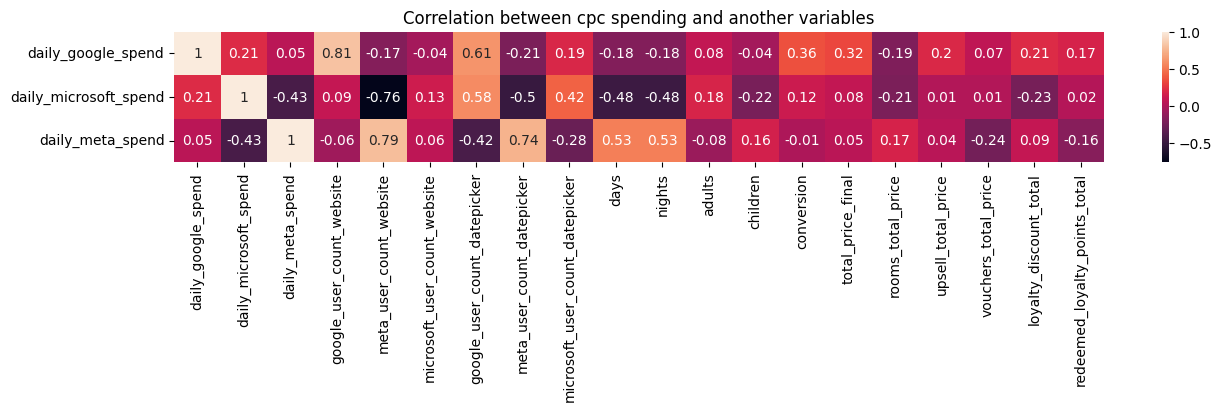

In [13]:
# correlation between cpc spend and another variables
# which variables are influenced by the higher cpc spending?
plt.figure(figsize=(15,1.7))
plt.title('Correlation between cpc spending and another variables')
sns.heatmap(ppc_data[ppc_data['hotel_id']=='hotel_1'].corr(method='spearman', numeric_only=True)[:3].round(2), annot=True)

In [14]:
# what is the cost of 1 website or datepicker visitor?
ppc_data['google_webvisit_cost'] = ppc_data['daily_google_spend'] / ppc_data['google_user_count_website']
ppc_data['google_datepvisit_cost'] = ppc_data['daily_google_spend'] / ppc_data['google_user_count_datepicker']

ppc_data['microsoft_webvisit_cost'] = ppc_data['daily_microsoft_spend'] / ppc_data['microsoft_user_count_website']
ppc_data['microsoft_datepvisit_cost'] = ppc_data['daily_microsoft_spend'] / ppc_data['microsoft_user_count_datepicker']

ppc_data['meta_webvisit_cost'] = ppc_data['daily_meta_spend'] / ppc_data['meta_user_count_website']
ppc_data['meta_datepvisit_cost'] = ppc_data['daily_meta_spend'] / ppc_data['meta_user_count_datepicker']

Text(0.5, 1.0, 'Hotel 3')

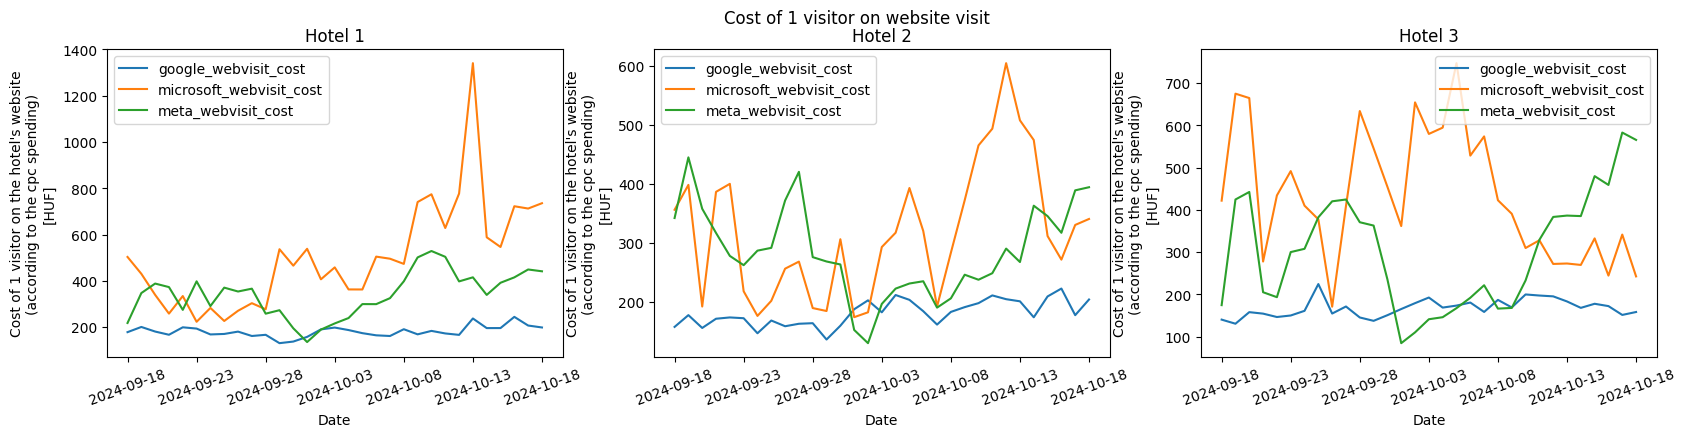

In [15]:
# cost of 1 visitor on website visit
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ppc_data[ppc_data['hotel_id']=='hotel_1'][['date','google_webvisit_cost','microsoft_webvisit_cost', 'meta_webvisit_cost']].plot(ax=ax1, kind='line', x='date').set_xticklabels(ax1.get_xticklabels(), rotation=20);
ppc_data[ppc_data['hotel_id']=='hotel_2'][['date','google_webvisit_cost','microsoft_webvisit_cost', 'meta_webvisit_cost']].plot(ax=ax2, kind='line', x='date').set_xticklabels(ax1.get_xticklabels(), rotation=20);
ppc_data[ppc_data['hotel_id']=='hotel_3'][['date','google_webvisit_cost','microsoft_webvisit_cost', 'meta_webvisit_cost']].plot(ax=ax3, kind='line', x='date').set_xticklabels(ax1.get_xticklabels(), rotation=20);

fig.suptitle('Cost of 1 visitor on website visit')
ax1.set_xlabel('Date')
ax2.set_xlabel('Date')
ax3.set_xlabel('Date')
ax1.set_ylabel("Cost of 1 visitor on the hotel's website""\n""(according to the cpc spending)""\n""[HUF]")
ax2.set_ylabel("Cost of 1 visitor on the hotel's website""\n""(according to the cpc spending)""\n""[HUF]")
ax3.set_ylabel("Cost of 1 visitor on the hotel's website""\n""(according to the cpc spending)""\n""[HUF]")
ax1.set_title('Hotel 1')
ax2.set_title('Hotel 2')
ax3.set_title('Hotel 3')

In [16]:
# define custom color palette for later plots
custom_palette = ["#CCD56B", "#B95D3B", "#649B92"]

Text(0.5, 0.98, 'Cost of 1 visitor on datepicker subpage visit')

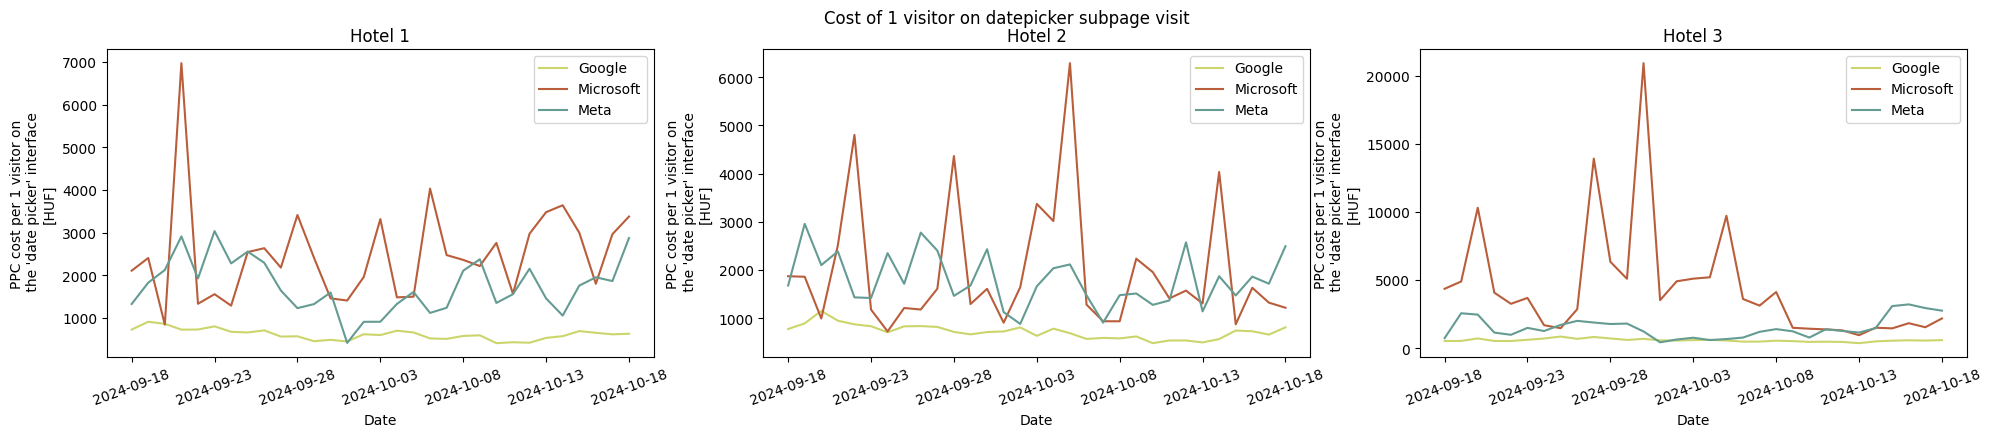

In [17]:
# cost of visitors on datepicker visit
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,4))
ppc_data[ppc_data['hotel_id']=='hotel_1'][['date','google_datepvisit_cost','microsoft_datepvisit_cost', 'meta_datepvisit_cost']].plot(ax=ax1, kind='line', x='date', color=custom_palette).set_xticklabels(ax1.get_xticklabels(), rotation=20)
ax1.set_xlabel('Date')
ax1.set_ylabel("PPC cost per 1 visitor on""\n"" the 'date picker' interface""\n""[HUF]")
ax1.legend(['Google','Microsoft','Meta'])
ppc_data[ppc_data['hotel_id']=='hotel_2'][['date','google_datepvisit_cost','microsoft_datepvisit_cost', 'meta_datepvisit_cost']].plot(ax=ax2, kind='line', x='date', color=custom_palette).set_xticklabels(ax1.get_xticklabels(), rotation=20)
ax2.set_xlabel('Date')
ax2.set_ylabel("PPC cost per 1 visitor on""\n"" the 'date picker' interface""\n""[HUF]")
ax2.legend(['Google','Microsoft','Meta'])
ppc_data[ppc_data['hotel_id']=='hotel_3'][['date','google_datepvisit_cost','microsoft_datepvisit_cost', 'meta_datepvisit_cost']].plot(ax=ax3, kind='line', x='date', color=custom_palette).set_xticklabels(ax1.get_xticklabels(), rotation=20)
ax3.set_xlabel('Date')
ax3.set_ylabel("PPC cost per 1 visitor on""\n"" the 'date picker' interface""\n""[HUF]")
ax3.legend(['Google','Microsoft','Meta'])
ax1.set_title('Hotel 1')
ax2.set_title('Hotel 2')
ax3.set_title('Hotel 3')

fig.suptitle('Cost of 1 visitor on datepicker subpage visit')

In [18]:
# is the total advertisement cost influeces the conversion rate?

ppc_data['total_ad_cost'] = ppc_data['daily_google_spend'] + ppc_data['daily_microsoft_spend'] + ppc_data['daily_meta_spend']

Text(0, 0.5, 'Total cpc cost per day')

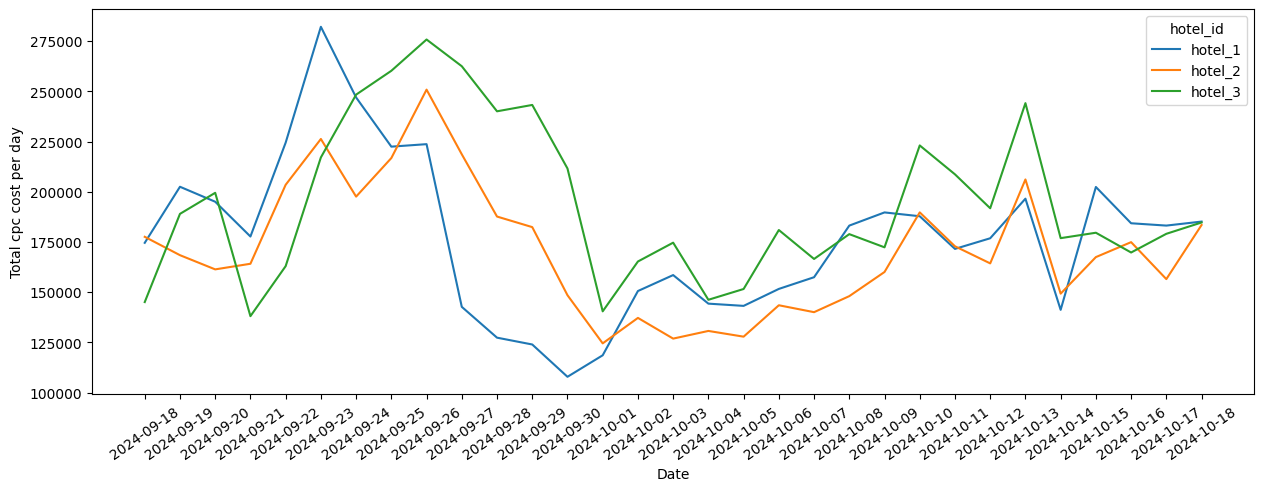

In [19]:
# total cpc cost through the observed time period
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(ax=ax, data=ppc_data, x='date', y='total_ad_cost', hue='hotel_id').set_xticklabels(ax.get_xticklabels(), rotation=35);
plt.xlabel('Date')
plt.ylabel('Total cpc cost per day')

Text(0.5, 1.0, 'Sum of cpc spending per day\nat the function of Conversion rate')

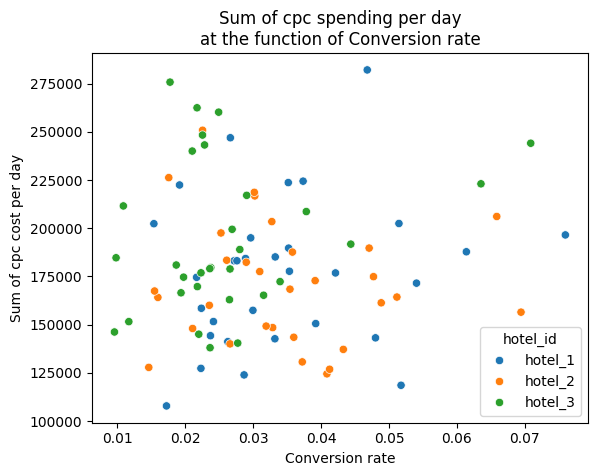

In [20]:
# Does higher overall cpc cost influences the conversion rate? - No, the picture is more complex
sns.scatterplot(data=ppc_data, x='conversion', y='total_ad_cost', hue='hotel_id')
plt.xlabel('Conversion rate')
plt.ylabel('Sum of cpc cost per day')
plt.title('Sum of cpc spending per day''\n''at the function of Conversion rate')

In [21]:
# what is the conversion rate between the visitors from different medium, cpc sources?

table_names = ['booking_data','search_log', 'search_log_session']

for k in table_names:
    globals()[k] = pd.DataFrame()
    for x in ['1','2','3']:
        actual_table = pd.read_csv('./../data-clean/hotel_'+x+'/'+k+'.csv', sep=',', encoding='ISO-8859-1', index_col='Unnamed: 0')
        globals()[k] = pd.concat([globals()[k], actual_table])

In [22]:
# some cleaning
# convert datetime format
search_log['utc_datetime'] = pd.to_datetime(search_log['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')

# unify utm source labels
search_log_session.dropna(subset='utm_source', inplace=True)
search_log_session.loc[search_log_session['utm_source'].str.contains('bing'), 'utm_source'] = 'microsoft'
search_log_session.loc[search_log_session['utm_source'].str.contains('facebook'), 'utm_source'] = 'meta'
search_log_session.loc[search_log_session['utm_source'].str.contains('instagram'), 'utm_source'] = 'meta'

# merge tables
merged_df = pd.merge(search_log,
                     search_log_session[search_log_session['utm_medium'] =='cpc'][['utm_source','hotel_id','id', 'uuid']], 
                     left_on=['hotel_id','search_log_session_id'], right_on=['hotel_id','id'], how='left')
merged_df.drop(columns=['id_x', 'search_log_session_id', 'lang_code', 'currency', 'arrival', 'departure', 'id_y'], inplace=True) # drop the unnecessary column

merged_df

,utc_datetime,days,nights,adults,children,conversion,total_price_final,hotel_id,utm_source,uuid
0,2024-09-17,5,4,2,0,0.0,0.0,hotel_1,NaN,NaN
1,2024-09-17,4,3,2,1,0.0,0.0,hotel_1,meta,2039466988.1726611511
2,2024-09-17,3,2,2,0,0.0,0.0,hotel_1,google,1556994523.1726611965
3,2024-09-17,5,4,4,0,0.0,0.0,hotel_1,NaN,NaN
4,2024-09-17,4,3,2,0,0.0,0.0,hotel_1,google,901475575.1726612653
...,...,...,...,...,...,...,...,...,...,...
57853,2024-10-18,3,2,2,2,0.0,0.0,hotel_3,google,1586093179.1729285523
57854,2024-10-18,3,2,2,2,0.0,0.0,hotel_3,google,1586093179.1729285523
57855,2024-10-18,3,2,2,2,0.0,0.0,hotel_3,NaN,NaN
57856,2024-10-18,3,2,2,2,0.0,0.0,hotel_3,NaN,NaN


In [23]:
# remove the searches from the same visitor, keep only the last one (as this is relevant for the booking)
merged_df.drop_duplicates(subset='uuid', keep='last', inplace=True)

In [24]:
# check the number of bookings (conversion)
merged_df[merged_df['conversion']==1].groupby(by=['hotel_id', 'utc_datetime', 'utm_source']).count()['conversion'].sum()

813

In [25]:
# create a table with conversion numbers, total final booking price and utm source per date
conversion_return =  pd.merge(
    merged_df[['conversion','hotel_id', 'utc_datetime', 'utm_source']].groupby(by=['hotel_id', 'utc_datetime', 'utm_source']).count().reset_index(), 
    merged_df[merged_df['conversion']==1][['conversion','total_price_final','hotel_id', 'utc_datetime', 'utm_source']].groupby(by=['hotel_id', 'utc_datetime', 'utm_source']).agg({'conversion':'count','total_price_final':'sum'}).reset_index(), 
    left_on=['hotel_id', 'utc_datetime', 'utm_source'], 
    right_on=['hotel_id', 'utc_datetime', 'utm_source'], 
    how='left')
conversion_return.fillna(value=0, inplace=True)

conversion_return

,hotel_id,utc_datetime,utm_source,conversion_x,conversion_y,total_price_final
0,hotel_1,2024-09-17,google,2,0.0,0.0
1,hotel_1,2024-09-17,meta,1,0.0,0.0
2,hotel_1,2024-09-18,google,94,4.0,838059.0
3,hotel_1,2024-09-18,meta,14,0.0,0.0
4,hotel_1,2024-09-18,microsoft,5,0.0,0.0
...,...,...,...,...,...,...
273,hotel_3,2024-10-17,meta,23,0.0,0.0
274,hotel_3,2024-10-17,microsoft,6,0.0,0.0
275,hotel_3,2024-10-18,google,178,4.0,775263.0
276,hotel_3,2024-10-18,meta,19,0.0,0.0


In [26]:
# calculate percentages for conversion
conversion_return['conversion_ratio'] = ((conversion_return['conversion_y']/conversion_return['conversion_x'])*100).round(2)

In [27]:
# check that where is the best the conversion ratio?
conversion_return[['hotel_id','utm_source','conversion_ratio']].groupby(by=['hotel_id','utm_source']).mean()

conversion_ratio
hotel_id utm_source                  
hotel_1  google              6.731875
         meta                0.619687
         microsoft          10.077000
hotel_2  google              5.807812
         meta                0.539032
         microsoft           9.341000
hotel_3  google              3.844194
         meta                0.560000
         microsoft           3.227931

In [28]:
# join with ppc data, to see the ppc cost for one conversion
# 'melt' method to convert the wide format to long
ppc_to_melt = ppc_data[['date', 'hotel_id', 'daily_google_spend', 'daily_microsoft_spend', 'daily_meta_spend']].rename(columns={'daily_google_spend':'google','daily_microsoft_spend':'microsoft','daily_meta_spend':'meta'})
ppc_to_melt = ppc_to_melt.melt(id_vars=['date','hotel_id'],value_vars=['google','microsoft','meta']).sort_values(by=['hotel_id','date'])
ppc_to_melt

,date,hotel_id,variable,value
0,2024-09-18,hotel_1,google,128044
93,2024-09-18,hotel_1,microsoft,10564
186,2024-09-18,hotel_1,meta,35950
1,2024-09-19,hotel_1,google,137322
94,2024-09-19,hotel_1,microsoft,12048
...,...,...,...,...
184,2024-10-17,hotel_3,microsoft,9220
277,2024-10-17,hotel_3,meta,61796
92,2024-10-18,hotel_3,google,110435
185,2024-10-18,hotel_3,microsoft,10912


In [29]:
# ppc spendings with conversion data for further analysis
ppc_with_conversion = pd.merge(conversion_return[['hotel_id','utc_datetime','utm_source','conversion_x','conversion_y','total_price_final']], ppc_to_melt,
         left_on=['hotel_id', 'utc_datetime', 'utm_source'], 
         right_on=['hotel_id', 'date', 'variable'], 
         how='left').drop(columns=['date', 'variable']).dropna(subset='value')
# calculate ppc spending/conversion rate
ppc_with_conversion['ppc_per_conversion'] = ppc_with_conversion['value']/ppc_with_conversion['conversion_y']

ppc_with_conversion

,hotel_id,utc_datetime,utm_source,conversion_x,conversion_y,total_price_final,value,ppc_per_conversion
2,hotel_1,2024-09-18,google,94,4.0,838059.00,128044.0,32011.00
3,hotel_1,2024-09-18,meta,14,0.0,0.00,35950.0,inf
4,hotel_1,2024-09-18,microsoft,5,0.0,0.00,10564.0,inf
5,hotel_1,2024-09-19,google,98,8.0,1159596.88,137322.0,17165.25
6,hotel_1,2024-09-19,meta,24,0.0,0.00,53112.0,inf
...,...,...,...,...,...,...,...,...
273,hotel_3,2024-10-17,meta,23,0.0,0.00,61796.0,inf
274,hotel_3,2024-10-17,microsoft,6,0.0,0.00,9220.0,inf
275,hotel_3,2024-10-18,google,178,4.0,775263.00,110435.0,27608.75
276,hotel_3,2024-10-18,meta,19,0.0,0.00,63345.0,inf


In [30]:
# raw number of conversions from each utm source, for each hotel
ppc_with_conversion[['hotel_id','utm_source','conversion_y']].groupby(by=['hotel_id','utm_source']).sum()

conversion_y
hotel_id utm_source              
hotel_1  google             272.0
         meta                 4.0
         microsoft           14.0
hotel_2  google             234.0
         meta                 3.0
         microsoft           11.0
hotel_3  google             264.0
         meta                 6.0
         microsoft            5.0

In [31]:
# sum of ppc cost for each utm source and for each hotel
ppc_with_conversion[['hotel_id','utm_source','value']].groupby(by=['hotel_id','utm_source']).sum()

value
hotel_id utm_source           
hotel_1  google      3559165.0
         meta        1492128.0
         microsoft    418736.0
hotel_2  google      3645957.0
         meta        1448225.0
         microsoft    206092.0
hotel_3  google      4115376.0
         meta        1412127.0
         microsoft    459508.0

In [32]:
# average income from bookings for each utm_source
ppc_with_conversion[['hotel_id','utm_source','total_price_final']].groupby(by=['hotel_id','utm_source']).sum()['total_price_final'] / ppc_with_conversion[['hotel_id','utm_source','conversion_y']].groupby(by=['hotel_id','utm_source']).sum()['conversion_y']

hotel_id  utm_source
hotel_1   google        161158.883860
          meta          243574.250000
          microsoft     113912.595714
hotel_2   google        170883.564915
          meta          185734.000000
          microsoft     168323.127273
hotel_3   google        157867.071477
          meta          175604.166667
          microsoft     110283.900000
dtype: float64

In [33]:
# average ppc spending for each conversion
ppc_with_conversion[['hotel_id','utm_source','value']].groupby(by=['hotel_id','utm_source']).sum()['value'] / ppc_with_conversion[['hotel_id','utm_source','conversion_y']].groupby(by=['hotel_id','utm_source']).sum()['conversion_y']

hotel_id  utm_source
hotel_1   google         13085.165441
          meta          373032.000000
          microsoft      29909.714286
hotel_2   google         15581.012821
          meta          482741.666667
          microsoft      18735.636364
hotel_3   google         15588.545455
          meta          235354.500000
          microsoft      91901.600000
dtype: float64

In [34]:
# check the standard deviation
ppc_with_conversion[['hotel_id','utm_source','value']].groupby(by=['hotel_id','utm_source']).std()['value'] / ppc_with_conversion[['hotel_id','utm_source','conversion_y']].groupby(by=['hotel_id','utm_source']).sum()['conversion_y']

hotel_id  utm_source
hotel_1   google           80.202742
          meta           7885.346891
          microsoft       319.087640
hotel_2   google           67.231493
          meta          10511.503637
          microsoft       160.137436
hotel_3   google           91.604877
          meta           4884.978920
          microsoft      1168.658931
dtype: float64

In [35]:
# create a table only with data if the guest converted
merged_df_if_conv = pd.merge(search_log[search_log['conversion']==1].drop_duplicates(subset='search_log_session_id'), 
                                     search_log_session[search_log_session['utm_medium'] =='cpc'][['utm_source','hotel_id','id']], 
                                     left_on=['hotel_id','search_log_session_id'], right_on=['hotel_id','id'], how='left', validate='1:1')

# drop na and unncessary columns
merged_df_if_conv.drop(columns=['id_x', 'search_log_session_id', 'lang_code', 'currency', 'arrival', 'departure', 'id_y', 'conversion'], inplace=True)
merged_df_if_conv.dropna(subset='utm_source', inplace=True)

merged_df_if_conv[['days', 'nights', 'adults', 'children','total_price_final', 'hotel_id', 'utm_source']].groupby(by=['hotel_id','utm_source']).mean()

days    nights    adults  children  total_price_final
hotel_id utm_source                                                           
hotel_1  google      3.571429  2.571429  2.377551  0.579082      158961.452883
         meta        3.500000  2.500000  2.833333  0.166667      207820.500000
         microsoft   3.578947  2.578947  2.263158  0.684211      125144.222632
hotel_2  google      3.540070  2.540070  2.236934  0.505226      171288.121507
         meta        3.000000  2.000000  2.666667  0.666667      185734.000000
         microsoft   3.428571  2.428571  2.071429  0.428571      166890.028571
hotel_3  google      3.465465  2.465465  2.177177  0.288288      158490.070060
         meta        3.333333  2.333333  2.000000  0.833333      175604.166667
         microsoft   2.666667  1.666667  2.000000  0.000000      104469.416667

In [36]:
# check the general features of guests who converted
merged_df_if_conv[['days', 'nights', 'adults', 'children','total_price_final', 'hotel_id']].groupby(by=['hotel_id']).mean()

,days,nights,adults,children,total_price_final
hotel_id,,,,,
hotel_1,3.570743,2.570743,2.378897,0.577938,158123.627722
hotel_2,3.529605,2.529605,2.233553,0.503289,171228.135765
hotel_3,3.449275,2.449275,2.171014,0.292754,157848.216899


In [37]:
# check the general features of guests who NOT converted
merged_df_if_conv_nocpc = pd.merge(search_log[search_log['conversion']==1].drop_duplicates(subset='search_log_session_id'), 
                                     search_log_session[(search_log_session['utm_medium'] != 'cpc') & (search_log_session['utm_medium'] != '(not set)')][['utm_source','hotel_id','id']], 
                                     left_on=['hotel_id','search_log_session_id'], right_on=['hotel_id','id'], how='left', validate='1:1')

merged_df_if_conv_nocpc.drop(columns=['id_x', 'search_log_session_id', 'lang_code', 'currency', 'arrival', 'departure', 'id_y', 'conversion'], inplace=True)
merged_df_if_conv_nocpc.dropna(subset='utm_source', inplace=True)

merged_df_if_conv_nocpc[['days', 'nights', 'adults', 'children','total_price_final', 'hotel_id']].groupby(by=['hotel_id']).mean()

,days,nights,adults,children,total_price_final
hotel_id,,,,,
hotel_1,3.626761,2.626761,2.436620,0.517606,149329.718037
hotel_2,3.375635,2.375635,2.045685,0.365482,140254.015685
hotel_3,3.549020,2.549020,2.254902,0.200980,153602.264902
